In [274]:
pip install --user googlemaps requests pandas numpy matplotlib openpyxl scikit-learn utm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('data/NYC_museums.csv')
df.head()

,the_geom,NAME,TEL,URL,ADRESS1,ADDRESS2,CITY,ZIP,COST
0,POINT (-74.01375579519738 40.703816216918035),Alexander Hamilton U.S. Custom House,(212) 514-3700,http://www.oldnycustomhouse.gov/,1 Bowling Grn,NaN,New York,"10,004",FALSE
1,POINT (-74.06303178855111 40.615120837755356),Alice Austen House Museum,(718) 816-4506,http://www.aliceausten.org/,2 Hylan Blvd,NaN,Staten Island,"10,305",FALSE
2,POINT (-73.94729768541572 40.833853500753314),American Academy of Arts and Letters,(212) 368-5900,http://www.artsandletters.org/,633 W. 155th St.,NaN,New York,"10,032",FALSE
3,POINT (-73.97810302110001 40.76162497138548),American Folk Art Museum,(212) 265-1040,http://www.folkartmuseum.org/,45 West 53rd Street,NaN,New York,"10,019",0
4,POINT (-74.0396848374904 40.69905626244391),American Immigration History Center,(212) 363-3200,http://www.ellisisland.org/,Ellis Island,NaN,New York,0,FALSE


In [5]:
df.columns

Index(['the_geom', 'NAME', 'TEL', 'URL', 'ADRESS1', 'ADDRESS2', 'CITY', 'ZIP',
       'COST'],
      dtype='object')

In [6]:
df.describe()

,the_geom,NAME,TEL,URL,ADRESS1,ADDRESS2,CITY,ZIP,COST
count,130,130,128,130,130,15,130,130,130
unique,130,130,123,129,123,15,7,59,2
top,POINT (-74.01375579519738 40.703816216918035),Alexander Hamilton U.S. Custom House,(212) 514-3700,http://www.ellisisland.org/,15 W. 16th St.,11th Floor,New York,"10,011",FALSE
freq,1,1,2,2,6,1,89,9,124


In [7]:
# Only need name and location
cols = [
    "the_geom",
    "NAME"
]

df = df[cols].dropna()
df.head()

,the_geom,NAME
0,POINT (-74.01375579519738 40.703816216918035),Alexander Hamilton U.S. Custom House
1,POINT (-74.06303178855111 40.615120837755356),Alice Austen House Museum
2,POINT (-73.94729768541572 40.833853500753314),American Academy of Arts and Letters
3,POINT (-73.97810302110001 40.76162497138548),American Folk Art Museum
4,POINT (-74.0396848374904 40.69905626244391),American Immigration History Center


In [8]:
df.describe()

,the_geom,NAME
count,130,130
unique,130,130
top,POINT (-74.01375579519738 40.703816216918035),Alexander Hamilton U.S. Custom House
freq,1,1


In [9]:
df = df.rename(columns={
    "NAME": "name",
    "ADDRESS2": "address",
    "FREE": "free",
})

In [10]:
coords = (
    df["the_geom"]
    .str.replace("POINT (", "", regex=False)
    .str.replace(")", "", regex=False)
    .str.split(" ", expand=True)
)

df["lon"] = coords[0].astype(float)
df["lat"] = coords[1].astype(float)

df[["lat", "lon"]].head()

,lat,lon
0,40.703816,-74.013756
1,40.615121,-74.063032
2,40.833854,-73.947298
3,40.761625,-73.978103
4,40.699056,-74.039685


In [11]:
df["indoor"] = True
df["museum"] = True
df

,the_geom,name,lon,lat,indoor,museum
0,POINT (-74.01375579519738 40.703816216918035),Alexander Hamilton U.S. Custom House,-74.013756,40.703816,True,True
1,POINT (-74.06303178855111 40.615120837755356),Alice Austen House Museum,-74.063032,40.615121,True,True
2,POINT (-73.94729768541572 40.833853500753314),American Academy of Arts and Letters,-73.947298,40.833854,True,True
3,POINT (-73.97810302110001 40.76162497138548),American Folk Art Museum,-73.978103,40.761625,True,True
4,POINT (-74.0396848374904 40.69905626244391),American Immigration History Center,-74.039685,40.699056,True,True
...,...,...,...,...,...,...
125,POINT (-73.99388579658319 40.73807723317813),American Sephardi Federation / Sephardic House,-73.993886,40.738077,True,True
126,POINT (-73.99379427245329 40.73795994708654),YIVO Institute for Jewish Research,-73.993794,40.737960,True,True
127,POINT (-73.99392890421056 40.738015384101416),American Jewish Historical Society,-73.993929,40.738015,True,True
128,POINT (-73.99381737049632 40.738045683847),Yeshiva University Museum,-73.993817,40.738046,True,True


In [12]:
import utm
coords = [
    utm.from_latlon(lat, lon)
    for lat, lon in zip(df["lat"], df["lon"])
]

df[["easting", "northing", "zone_number", "zone_letter"]] = coords

In [13]:
df = df.drop(columns=["the_geom", "zone_number", "zone_letter"])
df

,name,lon,lat,indoor,museum,easting,northing
0,Alexander Hamilton U.S. Custom House,-74.013756,40.703816,True,True,583315.457106,4506346.35643
1,Alice Austen House Museum,-74.063032,40.615121,True,True,579257.6019,4496455.143009
2,American Academy of Arts and Letters,-73.947298,40.833854,True,True,588756.555795,4520846.666029
3,American Folk Art Museum,-73.978103,40.761625,True,True,586252.66999,4512797.956947
4,American Immigration History Center,-74.039685,40.699056,True,True,581130.780345,4505793.704304
...,...,...,...,...,...,...,...
125,American Sephardi Federation / Sephardic House,-73.993886,40.738077,True,True,584950.478136,4510168.593108
126,YIVO Institute for Jewish Research,-73.993794,40.737960,True,True,584958.355254,4510155.662103
127,American Jewish Historical Society,-73.993929,40.738015,True,True,584946.917004,4510161.685713
128,Yeshiva University Museum,-73.993817,40.738046,True,True,584956.29587,4510165.15713


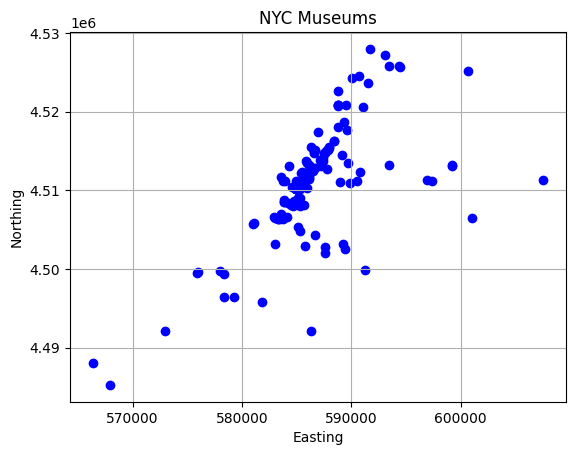

In [14]:
import matplotlib.pyplot as plt

plt.scatter(df["easting"], df["northing"], c='blue', marker='o')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('NYC Museums')
plt.grid()
plt.show()

In [15]:
num_locations = 3

In [16]:
start_lat = 40.7095
start_lon = -74.0145

end_lat = 40.7424
end_lon = -74.0061

In [17]:
data = {"name": ["start", "end"], "lat": [float(start_lat), float(end_lat)], "lon": [float(start_lon), float(end_lon)],
        "easting": [utm.from_latlon(float(start_lat), float(start_lon))[0], utm.from_latlon(float(end_lat), float(end_lon))[0]],
        "northing": [utm.from_latlon(float(start_lat), float(start_lon))[1], utm.from_latlon(float(end_lat), float(end_lon))[1]],}
df = pd.concat([df, pd.DataFrame(data)], ignore_index=True)

In [18]:
start_idx = df.index[(df["name"] == "start")][0]
print(start_idx)
end_idx = df.index[df["name"] == "end"][0]
print(end_idx)

130
131


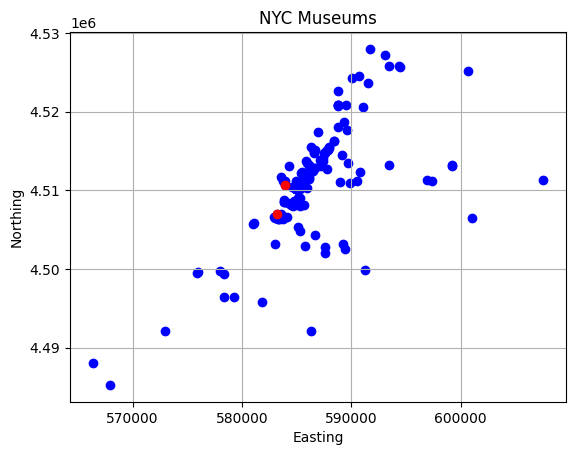

In [19]:
plt.figure()
plt.scatter(df["easting"], df["northing"], c='blue', marker='o')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('NYC Museums')
plt.scatter(df["easting"].iloc[start_idx], df["northing"].iloc[start_idx], c='red', marker='o')
plt.scatter(df["easting"].iloc[end_idx], df["northing"].iloc[end_idx], c='red', marker='o')
plt.grid()
plt.show()


In [23]:
# want to look at closest 10 points
from sklearn.neighbors import BallTree
import numpy as np

coords = np.radians(df[["lat", "lon"]].values)
tree = BallTree(coords, metric = "haversine")

# Find nearest 10 neighbors
dist, ind = tree.query(coords, k=10)


In [24]:
R = 6371.2 # Earth's radius in kilometers
dist = dist * R # Convert to kilometers

In [25]:
transport = "walk"

In [26]:
if transport == "walk":
    # Apply walking speed (5 km/h) to convert distance to time
    time = dist / 5  # Time in hours
else:
    # Apply driving speed (50 km/h) to convert distance to time
    time = dist / 50  # Time in hours

In [27]:
def haversine_dist(lat1, lon1, lat2, lon2):
    lat1, lon1 = np.radians(lat1), np.radians(lon1)
    lat2, lon2 = np.radians(np.array(lat2, dtype=float)), np.radians(np.array(lon2, dtype=float))

    dlat = lat2-lat1
    dlon = lon2-lon1

    havc = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    d = 2 * R * np.arcsin(np.sqrt(havc))
    return d

In [68]:
def distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

In [29]:
# greedy approach, take closest point to each starting from start point
def greedy_alg(df, start_idx, end_idx, num_locations):
    visited = [start_idx, end_idx]
    itinerary = [start_idx]
    current_idx = start_idx
    total_dist = 0

    for _ in range(num_locations):
        next_dists = distance(
            df.loc[current_idx, "easting"], df.loc[current_idx, "northing"],
            df["easting"].to_numpy(dtype=float), df["northing"].to_numpy(dtype=float)
        )
        next_dists[list(visited)] = np.inf  # Ignore already visited locations
        next_idx = np.argmin(next_dists)
        total_dist += next_dists[next_idx]
        itinerary.append(next_idx)
        visited.append(next_idx)
        current_idx = next_idx

    itinerary.append(end_idx)
    total_dist += distance(
        df.loc[current_idx, "easting"], df.loc[current_idx, "northing"],
        df.loc[end_idx, "easting"], df.loc[end_idx, "northing"]
    )
    return itinerary, total_dist

In [30]:
ny_itinerary, total_dist = greedy_alg(df, start_idx, end_idx, num_locations)

In [31]:
print(ny_itinerary)
full_itinerary = df.iloc[ny_itinerary]["name"]
print(full_itinerary)
print("Total distance (m):", total_dist)

[np.int64(130), np.int64(80), np.int64(66), np.int64(84), np.int64(131)]
130                                                start
80     National September 11 Memorial & Museum at the...
66                            Museum of American Finance
84                           New York City Police Museum
131                                                  end
Name: name, dtype: object
Total distance (m): 5354.98425392247


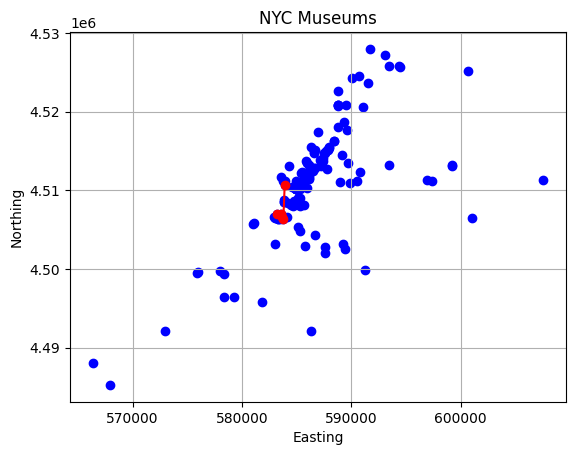

In [32]:
plt.scatter(df["easting"], df["northing"], c='blue', marker='o')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('NYC Museums')
plt.plot(df["easting"].iloc[ny_itinerary], df["northing"].iloc[ny_itinerary], c='red', marker='o')
plt.grid()
plt.show()

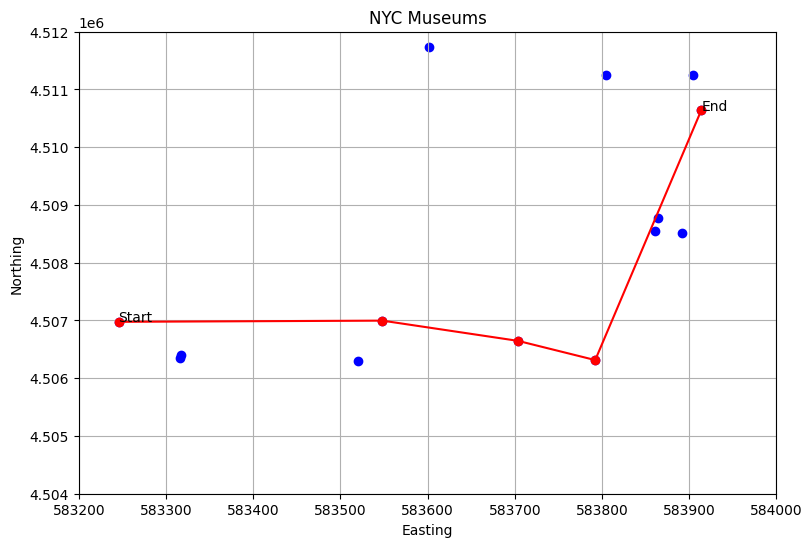

In [33]:
fig, ax = plt.subplots(figsize = (9,6))
plt.scatter(df["easting"], df["northing"], c='blue', marker='o')
plt.xlim(583200, 584000)
plt.ylim(4.504*10**6, 4.512*10**6)
plt.plot(df["easting"].iloc[ny_itinerary], df["northing"].iloc[ny_itinerary], c='red', marker='o')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('NYC Museums')
ax.annotate('Start', xy=(df["easting"].iloc[start_idx]-0.0001, df["northing"].iloc[start_idx]), xytext=(df["easting"].iloc[start_idx]-0.001, df["northing"].iloc[start_idx]-0.002))
ax.annotate('End', xy=(df["easting"].iloc[end_idx]+0.0001, df["northing"].iloc[end_idx]), xytext=(df["easting"].iloc[end_idx]+0.0003, df["northing"].iloc[end_idx]+0.001))
plt.grid()
plt.show()

So not necessarily the best path - there are a few more museums they could reach that would seem more optimal

In [34]:
print(ind[start_idx])
closest = ind[start_idx]

[130  80 105  73  66  79   0  33  84 108]


In [35]:
print(dist[start_idx])

[0.         0.30261626 0.49944877 0.52080827 0.56388786 0.57954229
 0.63513336 0.72883584 0.85896735 0.96400479]


In [36]:
print(df.iloc[80])

name        National September 11 Memorial & Museum at the...
lon                                                -74.010916
lat                                                 40.709654
indoor                                                   True
museum                                                   True
easting                                         583548.090919
northing                                       4506997.138927
Name: 80, dtype: object


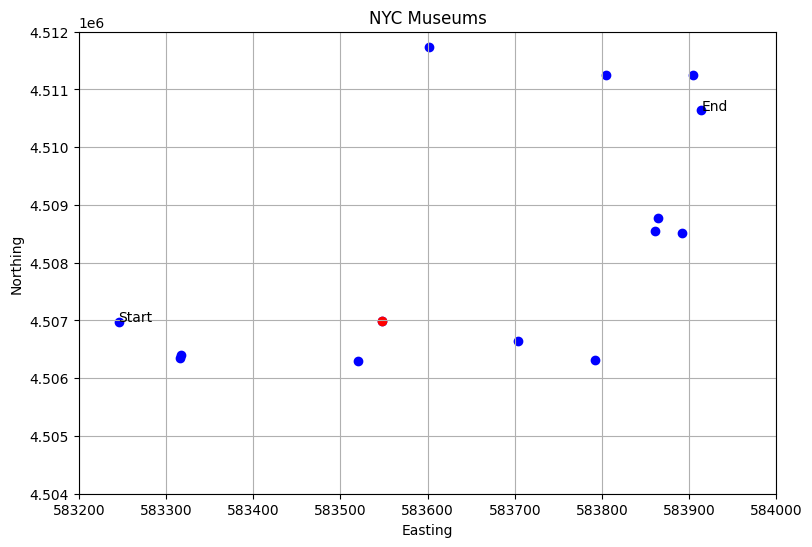

In [37]:
fig, ax = plt.subplots(figsize = (9,6))
plt.scatter(df["easting"], df["northing"], c='blue', marker='o')
plt.xlim(583200, 584000)
plt.ylim(4.504*10**6, 4.512*10**6)
plt.scatter(df["easting"].iloc[closest[1]], df["northing"].iloc[closest[1]], c='red', marker='o')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('NYC Museums')
ax.annotate('Start', xy=(df["easting"].iloc[start_idx]-0.0001, df["northing"].iloc[start_idx]), xytext=(df["easting"].iloc[start_idx]-0.001, df["northing"].iloc[start_idx]-0.002))
ax.annotate('End', xy=(df["easting"].iloc[end_idx]+0.0001, df["northing"].iloc[end_idx]), xytext=(df["easting"].iloc[end_idx]+0.0003, df["northing"].iloc[end_idx]+0.001))
plt.grid()
plt.show()

In [38]:
# can try using beam search
def beam_search(df, start_idx, end_idx, num_locations, beam_width=5):
    beams = [([start_idx], 0)]

    for _ in range(num_locations):
        new_beams = []
        for itinerary, cost in beams:
            current = itinerary[-1]
            unused = set(df.index) - set(itinerary) - {end_idx}
            for nxt in unused:
                dist = distance(
                    df.loc[current,"easting"], df.loc[current,"northing"],
                    df.loc[nxt,"easting"], df.loc[nxt,"northing"]
                )
                new_beams.append((itinerary+[nxt], cost+dist))

        beams = sorted(new_beams, key=lambda x: x[1])[:beam_width]
    total = []
    for itinerary, cost in beams:
        last = itinerary[-1]
        end = distance(
        df.loc[last, "easting"], df.loc[last, "northing"],
        df.loc[end_idx, "easting"], df.loc[end_idx, "northing"]
    )
        total.append((itinerary+[end_idx], cost + end))

    best_itinerary, best_cost = min(total, key = lambda x: x[1])
    return best_itinerary, best_cost
        

In [39]:
itinerary, total_dist = beam_search(df, start_idx, end_idx, num_locations, beam_width=5)

In [40]:
print(itinerary)
full_itinerary = df.iloc[itinerary]["name"]
print(full_itinerary)
print(total_dist)

[np.int64(130), 79, 0, 33, np.int64(131)]
130                                     start
79     National Museum of the American Indian
0        Alexander Hamilton U.S. Custom House
33                     Fraunces Tavern Museum
131                                       end
Name: name, dtype: object
5196.234813457396


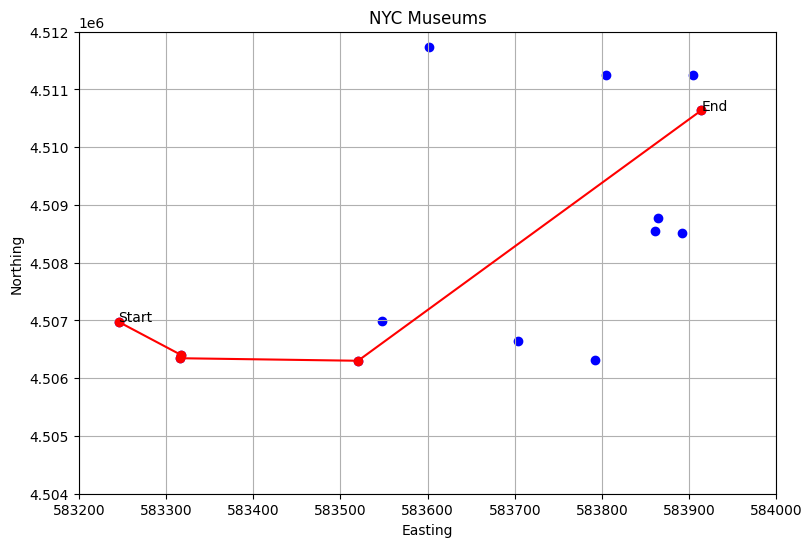

In [41]:
fig, ax = plt.subplots(figsize = (9,6))
plt.scatter(df["easting"], df["northing"], c='blue', marker='o')
plt.xlim(583200, 584000)
plt.ylim(4.504*10**6, 4.512*10**6)
plt.plot(df["easting"].iloc[itinerary], df["northing"].iloc[itinerary], c='red', marker='o')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('NYC Museums')
ax.annotate('Start', xy=(df["easting"].iloc[start_idx]-0.0001, df["northing"].iloc[start_idx]), xytext=(df["easting"].iloc[start_idx]-0.001, df["northing"].iloc[start_idx]-0.002))
ax.annotate('End', xy=(df["easting"].iloc[end_idx]+0.0001, df["northing"].iloc[end_idx]), xytext=(df["easting"].iloc[end_idx]+0.0003, df["northing"].iloc[end_idx]+0.001))
plt.grid()
plt.show()

5196 is even more optimized than the other distance

In [42]:
def normalize(v):
    return v/np.linalg.norm(v)

In [43]:
def point_to_path(start, end, points):
    """
    points: (n_points,2) array
    start, end: (2,) array
    Returns: perpendicular distances of all points to the line start->end
    """
    start  = start.astype(float)
    end    = end.astype(float)
    points = points.astype(float)
    se = end - start              
    se_norm2 = np.dot(se, se)   

    # vector from start to each point
    vec = points - start

    # projection length along line
    proj_len = np.dot(vec, se) / se_norm2

    # projected point on the line
    Q = start + proj_len[:, np.newaxis] * se
    # perpendicular distance
    d_perp = np.linalg.norm(points - Q, axis=1)

    return d_perp

In [62]:
# want to implement one greedy algorithm based on directions
def greedy_dir_alg(df, start_idx, end_idx, num_locations, alpha=0.5, beta=2.0, gamma=0.5):
    itinerary = [start_idx]
    visited = [start_idx, end_idx]

    start = df.iloc[start_idx][["easting", "northing"]].to_numpy(dtype=float)
    end = df.iloc[end_idx][["easting", "northing"]].to_numpy(dtype=float)

    current_idx = start_idx
    curr = start
    total_dist = 0

    for _ in range(num_locations):
        best_idx = None

        dir = end - curr
        dir /= np.linalg.norm(dir)

        curr = df.iloc[current_idx][["easting", "northing"]].to_numpy(dtype=float)
        points = df[["easting", "northing"]].to_numpy(dtype=float)

        vect = points-curr
        dists = np.linalg.norm(vect, axis=1)
        dists[dists == 0] = np.inf  # avoid division by zero
        align = np.dot(vect / dists[:, None], dir)
        remain = np.linalg.norm(end - points, axis=1)

        # closer distances to current point are better, higher alignment is better, closer to end is better (can adjust)
        # default is no preference for closer points vs farther points on a route
        score = alpha * dists - beta * align + gamma * remain

        score[visited] = np.inf
        best_idx = np.argmin(score)
        total_dist += dists[best_idx]
        visited.append(best_idx)
        itinerary.append(best_idx)
        current_idx = best_idx

    itinerary.append(end_idx)
    total_dist += np.linalg.norm(
        df.iloc[current_idx][["easting", "northing"]].values - end
    )
    return itinerary, total_dist

In [45]:
itinerary, total_dist = greedy_dir_alg(df, start_idx, end_idx, num_locations)

In [ ]:
print(itinerary)
full_itinerary = df.iloc[itinerary]["name"]
print(full_itinerary)
print(total_dist)

[np.int64(130), np.int64(83), np.int64(6), np.int64(47), np.int64(131)]
130                          start
83       New York City Fire Museum
6      American Numismatic Society
47          Jackie Robinson Museum
131                            end
Name: name, dtype: object
4274.414655310364


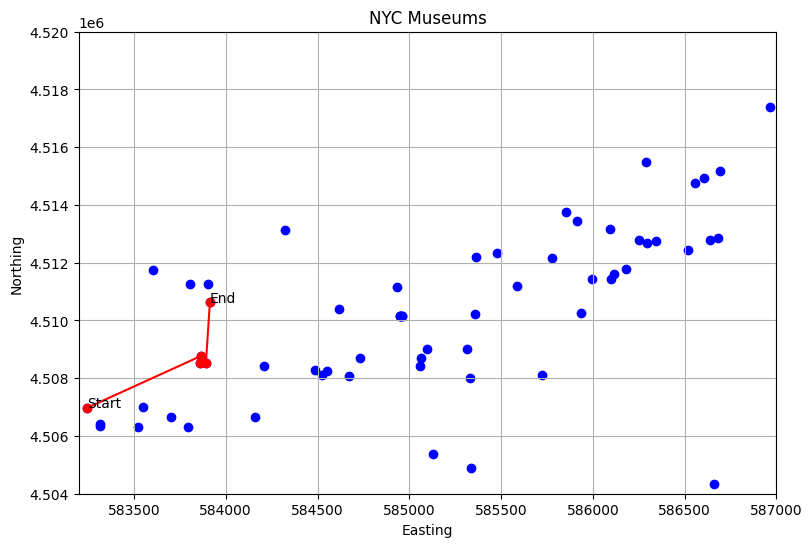

In [47]:
fig, ax = plt.subplots(figsize = (9,6))
plt.scatter(df["easting"], df["northing"], c='blue', marker='o')
plt.xlim(583200, 587000)
plt.ylim(4.504*10**6, 4.52*10**6)
plt.plot(df["easting"].iloc[itinerary], df["northing"].iloc[itinerary], c='red', marker='o')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('NYC Museums')
ax.annotate('Start', xy=(df["easting"].iloc[start_idx]-0.0001, df["northing"].iloc[start_idx]), xytext=(df["easting"].iloc[start_idx]-0.001, df["northing"].iloc[start_idx]-0.002))
ax.annotate('End', xy=(df["easting"].iloc[end_idx]+0.0001, df["northing"].iloc[end_idx]), xytext=(df["easting"].iloc[end_idx]+0.0003, df["northing"].iloc[end_idx]+0.001))
plt.grid()
plt.show()

This is much more optimized! Let's try other start and end points.

In [113]:
df = df.drop(index=[start_idx, end_idx])

In [114]:
df.tail()

,name,lon,lat,indoor,museum,easting,northing
125,American Sephardi Federation / Sephardic House,-73.993886,40.738077,True,True,584950.478136,4510168.593108
126,YIVO Institute for Jewish Research,-73.993794,40.737960,True,True,584958.355254,4510155.662103
127,American Jewish Historical Society,-73.993929,40.738015,True,True,584946.917004,4510161.685713
128,Yeshiva University Museum,-73.993817,40.738046,True,True,584956.29587,4510165.15713
129,Center For Jewish History,-73.993869,40.737987,True,True,584952.030695,4510158.566936


In [30]:
start_lat = 40.7424
start_lon = -74.0061

end_lat = 40.7021
end_lon = -73.9921

In [31]:
num_locations = 11

In [32]:
data = {"name": ["start", "end"], "lat": [float(start_lat), float(end_lat)], "lon": [float(start_lon), float(end_lon)],
        "easting": [utm.from_latlon(float(start_lat), float(start_lon))[0], utm.from_latlon(float(end_lat), float(end_lon))[0]],
        "northing": [utm.from_latlon(float(start_lat), float(start_lon))[1], utm.from_latlon(float(end_lat), float(end_lon))[1]],}
df = pd.concat([df, pd.DataFrame(data)], ignore_index=True)

In [33]:
start_idx = df.index[(df["name"] == "start")][0]
print(start_idx)
end_idx = df.index[df["name"] == "end"][0]
print(end_idx)

130
131


In [134]:
itinerary, total_dist = greedy_dir_alg(df, start_idx, end_idx, num_locations)
print(itinerary)
full_itinerary = df.iloc[itinerary]["name"]
print(full_itinerary)
print(total_dist)

[np.int64(130), np.int64(20), np.int64(46), np.int64(70), np.int64(8), np.int64(112), np.int64(113), np.int64(82), np.int64(30), np.int64(71), np.int64(28), np.int64(108), np.int64(131)]
130                                      start
20               Children's Museum of the Arts
46                     Italian American Museum
70                Museum Of Chinese In America
8                        Anne Frank Center USA
112                            Tenement Museum
113            The Freakatorium, El Museo Loco
82              New Museum of Contemporary Art
30                East Village History Project
71     Museum of Comic and Cartoon Art (MoCCA)
28                              Drawing Center
108                South Street Seaport Museum
131                                        end
Name: name, dtype: object
9114.450238871463


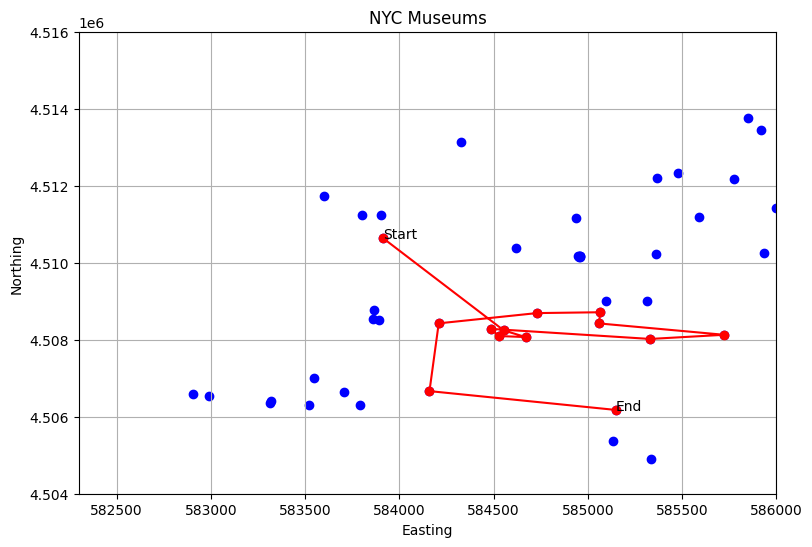

In [120]:
fig, ax = plt.subplots(figsize = (9,6))
plt.scatter(df["easting"], df["northing"], c='blue', marker='o')
plt.xlim(582300, 586000)
plt.ylim(4.504*10**6, 4.516*10**6)
plt.plot(df["easting"].iloc[itinerary], df["northing"].iloc[itinerary], c='red', marker='o')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('NYC Museums')
ax.annotate('Start', xy=(df["easting"].iloc[start_idx]-0.0001, df["northing"].iloc[start_idx]), xytext=(df["easting"].iloc[start_idx]-0.001, df["northing"].iloc[start_idx]-0.002))
ax.annotate('End', xy=(df["easting"].iloc[end_idx]+0.0001, df["northing"].iloc[end_idx]), xytext=(df["easting"].iloc[end_idx]+0.0003, df["northing"].iloc[end_idx]+0.001))
plt.grid()
plt.show()

In [59]:
def path_cost(order):
    total_dist = 0
    for i in range(len(order)-1):
        total_dist += distance(
            df.loc[order[i], "easting"], df.loc[order[i], "northing"],
            df.loc[order[i+1], "easting"], df.loc[order[i+1], "northing"]
        )
    return total_dist

In [46]:
X = df[["easting", "northing"]].to_numpy(dtype=float)

diff = X[:, None, :] - X[None, :, :]   # shape (n, n, 2)
distance_mat = np.linalg.norm(diff, axis=2)

In [123]:
print(distance_mat)

[[    0.         10691.22499111 15487.56060226 ...  4148.65304073
   4331.85897512  1839.49053251]
 [10691.22499111     0.         26175.87668689 ... 14839.48606301
  14926.35856367 11366.31379833]
 [15487.56060226 26175.87668689     0.         ... 11345.03739364
  11300.2784826  15107.57199189]
 ...
 [ 4148.65304073 14839.48606301 11345.03739364 ...     0.
   1143.09952057  3986.73235048]
 [ 4331.85897512 14926.35856367 11300.2784826  ...  1143.09952057
      0.          4627.48518693]
 [ 1839.49053251 11366.31379833 15107.57199189 ...  3986.73235048
   4627.48518693     0.        ]]


In [124]:
# brute force way
from itertools import permutations
def organize_path(order):
    best_order = None
    min_cost = np.inf
    for perm in permutations(order):
        cost = path_cost(perm)
        if cost < min_cost:
            min_cost = cost
            best_order = perm
    return best_order, min_cost

In [18]:
from itertools import combinations
def organize_path_dp(order, distance_mat):
    n = len(order)
    map = {}
    idx_map = {i: i-1 for i in range(1,n-1)}  # exclude start and end

    # base case, only visited 1 node
    for i in range(1,n-1):
        map[(1 << idx_map[i], i)] = (0, distance_mat[order[0], order[i]])  # map(visited nodes, last_node) = (last node, distance)

    # for any visited set
    for set_len in range(2, n-1):
        for subset in combinations(range(1, n-1), set_len):
            visited = sum(1 << idx_map[j] for j in subset)
            for node in subset:
                prev_visited = visited ^ (1 << idx_map[node]) # visited without that one node
                best_dist = np.inf
                best_prev = None
                # pick a different node from prev_visited to come from
                for k in subset:
                    if k == node:
                        continue
                    _, prev_dist = map[(prev_visited, k)]
                    new_dist = prev_dist + distance_mat[order[k], order[node]]
                    if new_dist < best_dist:
                        best_dist = new_dist
                        best_prev = k
                map[(visited, node)] = (best_prev, best_dist)
                #print(f"Visited: {visited}, Last node: {node}, Prev: {best_prev}, Dist: {best_dist}")
    # finish at end node
    full_visited = (1 << (n-2)) - 1  # all nodes except start and end
    best_dist = np.inf
    end_prev = None
    for i in range(1, n-1):
        _, prev_dist = map[(full_visited, i)]
        new_dist = prev_dist + distance_mat[order[i], order[-1]]
        if new_dist < best_dist:
            best_dist = new_dist
            end_prev = i

    # reconstruct path by going from end to beginning
    path = [order[-1], order[end_prev]]
    visited = full_visited
    curr = end_prev

    while visited:
        prev, _ = map[(visited, curr)]
        path.append(order[prev])
        visited = visited ^ (1 << idx_map[curr])
        curr = prev
    path.reverse()
    print(path)
    return path, best_dist

In [47]:
best, best_dist = organize_path_dp(itinerary, distance_mat)
print(best)
full_itinerary = df.iloc[best]["name"]
print(full_itinerary)
print(best_dist)

NameError: name 'itinerary' is not defined

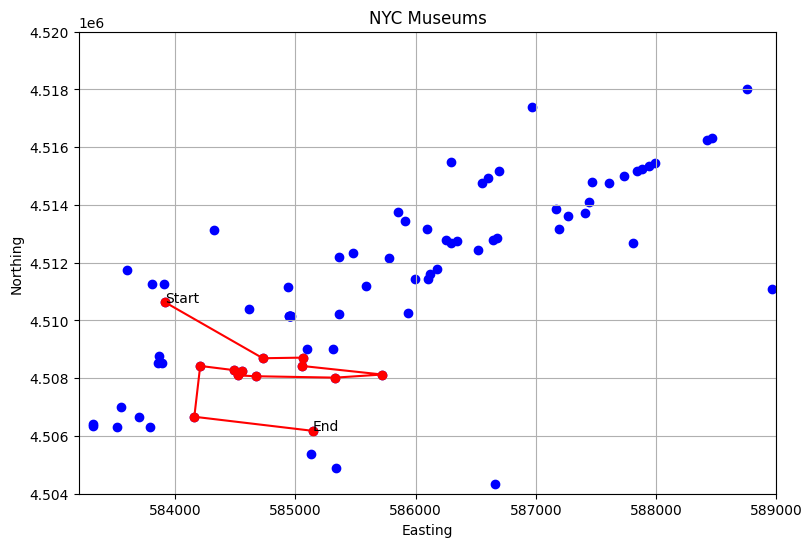

In [161]:
fig, ax = plt.subplots(figsize = (9,6))
plt.scatter(df["easting"], df["northing"], c='blue', marker='o')
plt.xlim(583200, 589000)
plt.ylim(4.504*10**6, 4.52*10**6)
plt.plot(df["easting"].iloc[best], df["northing"].iloc[best], c='red', marker='o')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('NYC Museums')
ax.annotate('Start', xy=(df["easting"].iloc[start_idx]-0.0001, df["northing"].iloc[start_idx]), xytext=(df["easting"].iloc[start_idx]-0.001, df["northing"].iloc[start_idx]-0.002))
ax.annotate('End', xy=(df["easting"].iloc[end_idx]+0.0001, df["northing"].iloc[end_idx]), xytext=(df["easting"].iloc[end_idx]+0.0003, df["northing"].iloc[end_idx]+0.001))
plt.grid()
plt.show()

In [137]:
def two_opt_path(order, dist_fn):
    best = order.copy()
    best_cost = path_cost(best)

    improved = True
    while improved:
        improved = False
        for i in range(1, len(best) - 2):
            for j in range(i + 1, len(best) - 1):
                new_order = (
                    best[:i] +
                    best[i:j][::-1] +
                    best[j:]
                )
                new_cost = path_cost(new_order)
                if new_cost < best_cost:
                    best = new_order
                    best_cost = new_cost
                    improved = True
        if not improved:
            break
    return best, best_cost


In [138]:
best, best_dist = two_opt_path(itinerary, distance_mat)
print(best)
full_itinerary = df.iloc[best]["name"]
print(full_itinerary)
print(best_dist)

[np.int64(130), np.int64(30), np.int64(82), np.int64(113), np.int64(112), np.int64(46), np.int64(70), np.int64(20), np.int64(8), np.int64(71), np.int64(28), np.int64(108), np.int64(131)]
130                                      start
30                East Village History Project
82              New Museum of Contemporary Art
113            The Freakatorium, El Museo Loco
112                            Tenement Museum
46                     Italian American Museum
70                Museum Of Chinese In America
20               Children's Museum of the Arts
8                        Anne Frank Center USA
71     Museum of Comic and Cartoon Art (MoCCA)
28                              Drawing Center
108                South Street Seaport Museum
131                                        end
Name: name, dtype: object
8624.801290134837


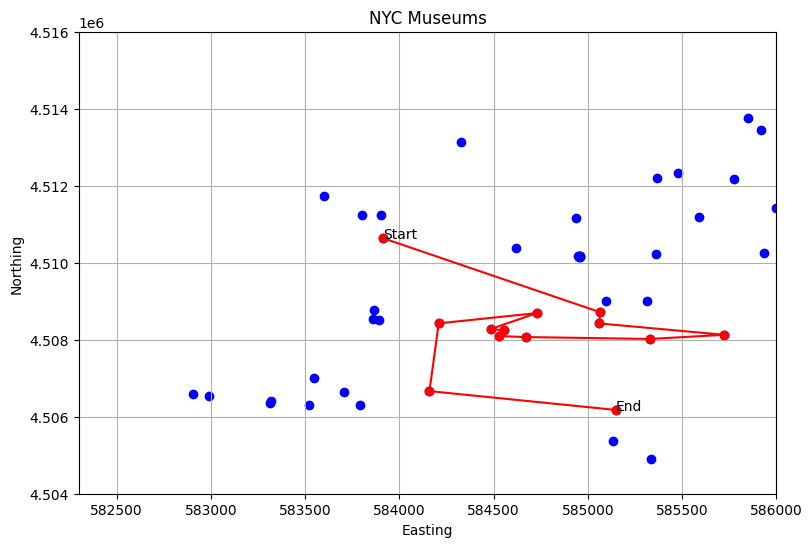

In [140]:
fig, ax = plt.subplots(figsize = (9,6))
plt.scatter(df["easting"], df["northing"], c='blue', marker='o')
plt.xlim(582300, 586000)
plt.ylim(4.504*10**6, 4.516*10**6)
plt.plot(df["easting"].iloc[best], df["northing"].iloc[best], c='red', marker='o')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('NYC Museums')
ax.annotate('Start', xy=(df["easting"].iloc[start_idx]-0.0001, df["northing"].iloc[start_idx]), xytext=(df["easting"].iloc[start_idx]-0.001, df["northing"].iloc[start_idx]-0.002))
ax.annotate('End', xy=(df["easting"].iloc[end_idx]+0.0001, df["northing"].iloc[end_idx]), xytext=(df["easting"].iloc[end_idx]+0.0003, df["northing"].iloc[end_idx]+0.001))
plt.grid()
plt.show()

So dynamic programming is more optimized than the swapping of different locations for optimization of paths!

In [19]:
loop = True

In [100]:
# creating loops if same starting and ending points
# pick k nearest points based on radius to start/end
def pick_k_nearest(df, start_idx, num_locations):
    start = df.iloc[start_idx][["easting", "northing"]].to_numpy(dtype=float)
    points = df[["easting", "northing"]].to_numpy(dtype=float)
    dists = np.linalg.norm(points - start, axis=1)
    order = np.argsort(dists)
    return list(order[1:num_locations+1])  # exclude start point itself

In [101]:
order = pick_k_nearest(df, start_idx, num_locations)
print(order)

[np.int64(80), np.int64(105), np.int64(73), np.int64(66), np.int64(79), np.int64(0), np.int64(33), np.int64(84), np.int64(108), np.int64(47), np.int64(6)]


In [102]:
order = pick_k_nearest(df, start_idx, num_locations) + [start_idx]
order = [start_idx] + order
best, best_dist = organize_path_dp(order, distance_mat)
print(best)
print(best_dist)

[np.int64(130), np.int64(73), np.int64(105), np.int64(79), np.int64(0), np.int64(33), np.int64(84), np.int64(66), np.int64(108), np.int64(47), np.int64(6), np.int64(80), np.int64(130)]
[np.int64(130), np.int64(73), np.int64(105), np.int64(79), np.int64(0), np.int64(33), np.int64(84), np.int64(66), np.int64(108), np.int64(47), np.int64(6), np.int64(80), np.int64(130)]
6100.125730742076


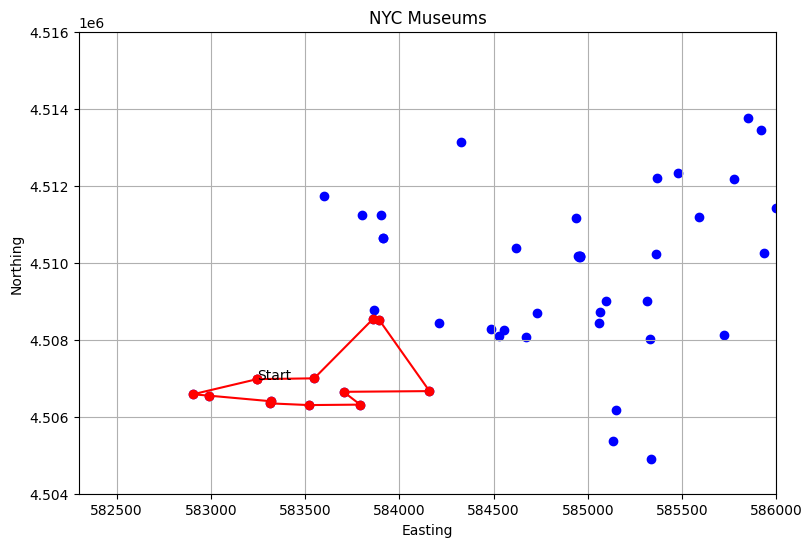

In [103]:
fig, ax = plt.subplots(figsize = (9,6))
plt.scatter(df["easting"], df["northing"], c='blue', marker='o')
plt.xlim(582300, 586000)
plt.ylim(4.504*10**6, 4.516*10**6)
plt.plot(df["easting"].iloc[best], df["northing"].iloc[best], c='red', marker='o')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('NYC Museums')
ax.annotate('Start', xy=(df["easting"].iloc[start_idx]-0.0001, df["northing"].iloc[start_idx]), xytext=(df["easting"].iloc[start_idx]-0.001, df["northing"].iloc[start_idx]-0.002))
plt.grid()
plt.show()

In [ ]:
# want to implement one greedy algorithm based on directions
def pick_loop_points(df, start_idx, end_idx, num_locations, alpha=0.5, beta=2.0, gamma=0.5):
    itinerary = [start_idx]
    visited = [start_idx, end_idx]

    start = df.iloc[start_idx][["easting", "northing"]].to_numpy(dtype=float)
    end = df.iloc[end_idx][["easting", "northing"]].to_numpy(dtype=float)

    current_idx = start_idx
    curr = start
    total_dist = 0
    weight1 = -beta/(2*num_locations)
    increase1 = beta/num_locations
    weight2 = -gamma/(2*num_locations)
    increase2 = gamma/num_locations

    for _ in range(num_locations):
        best_idx = None

        curr = df.iloc[current_idx][["easting", "northing"]].to_numpy(dtype=float)
        dir = end - curr
        dir /= np.linalg.norm(dir)
        points = df[["easting", "northing"]].to_numpy(dtype=float)

        vect = points-curr
        dists = np.linalg.norm(vect, axis=1)
        dists[dists == 0] = np.inf  # avoid division by zero
        align = np.dot(vect / dists[:, None], dir)
        remain = np.linalg.norm(end - points, axis=1)

        # closer distances to current point are better, higher alignment is better, closer to end is better (can adjust)
        # default is no preference for closer points vs farther points on a route
        score = alpha * dists - weight1 * align + weight2 * remain

        score[visited] = np.inf
        best_idx = np.argmin(score)
        total_dist += dists[best_idx]
        visited.append(best_idx)
        itinerary.append(best_idx)
        current_idx = best_idx
        weight1 += increase1
        weight2 += increase2

    itinerary.append(end_idx)
    total_dist += np.linalg.norm(
        df.iloc[current_idx][["easting", "northing"]].values - end
    )
    return itinerary, total_dist

In [158]:
itinerary, total_dist = pick_loop_points(df, start_idx, start_idx, num_locations)
print(itinerary)
full_itinerary = df.iloc[itinerary]["name"]
print(full_itinerary)
print(total_dist)

[np.int64(130), np.int64(0), np.int64(1), np.int64(35), np.int64(78), np.int64(110), np.int64(90), np.int64(109), np.int64(32), np.int64(4), np.int64(73), np.int64(105), np.int64(130)]
130                                                start
0                   Alexander Hamilton U.S. Custom House
1                              Alice Austen House Museum
35                               Garibaldi-Meucci Museum
78                            National Lighthouse Museum
110    Staten Island Museum / Staten Island Institute...
90                             Noble Maritime Collection
109                      Staten Island Children's Museum
32                                   Ellis Island Museum
4                    American Immigration History Center
73                             Museum of Jewish Heritage
105                                    Skyscraper Museum
130                                                start
Name: name, dtype: object
28538.30358267044


C:\Users\User\AppData\Local\Temp\ipykernel_4808\2788942545.py:21: RuntimeWarning: invalid value encountered in divide
  dir /= np.linalg.norm(dir)
C:\Users\User\AppData\Local\Temp\ipykernel_4808\2788942545.py:21: RuntimeWarning: invalid value encountered in divide
  dir /= np.linalg.norm(dir)


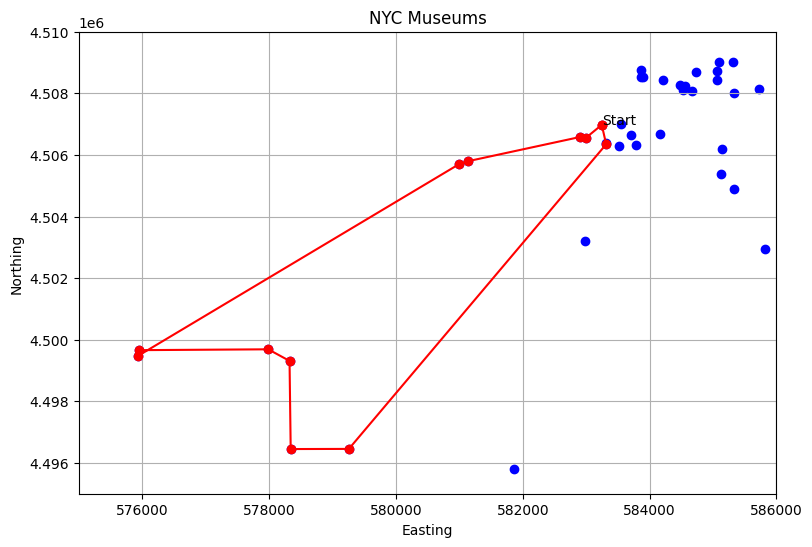

In [159]:
fig, ax = plt.subplots(figsize = (9,6))
plt.scatter(df["easting"], df["northing"], c='blue', marker='o')
plt.xlim(575000, 586000)
plt.ylim(4.495*10**6, 4.51*10**6)
plt.plot(df["easting"].iloc[itinerary], df["northing"].iloc[itinerary], c='red', marker='o')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('NYC Museums')
ax.annotate('Start', xy=(df["easting"].iloc[start_idx]-0.0001, df["northing"].iloc[start_idx]), xytext=(df["easting"].iloc[start_idx]-0.001, df["northing"].iloc[start_idx]-0.002))
plt.grid()
plt.show()

Issue - not always using the alignment term - based on some alignment and mostly distances to next point and distance to the end point

In [69]:
# want a code for a loop aimed at an angle from the start (with no angle between points going past 180 degrees from the start)
def pick_angled_loop_points(df, start_idx, num_locations, cen):
    points = df[["easting", "northing"]].to_numpy(dtype=float)

    # Polar coords
    vect = points - cen
    r = np.linalg.norm(vect, axis=1)
    theta = np.arctan2(vect[:,1], vect[:,0])

    # Pick k points near radius, defined by distance to start
    r0 = r[start_idx]
    idx = np.argsort(np.abs(r - r0))[:num_locations+1]  # +1 to account for start point

    selected_theta = theta[idx]

    # Order circularly
    order = np.argsort(selected_theta)
    itinerary = list(idx[order]) + [start_idx]  # include start point at end
    total_dist = path_cost(itinerary)

    return itinerary, total_dist

In [70]:
points = df[["easting", "northing"]].to_numpy(dtype=float)
cen = np.mean(points, axis=0)

In [71]:
order, total_dist = pick_angled_loop_points(df, start_idx, num_locations, cen)
print(order)
print(total_dist)

[np.int64(130), np.int64(80), np.int64(79), np.int64(66), np.int64(33), np.int64(84), np.int64(108), np.int64(133), np.int64(50), np.int64(23), np.int64(77), np.int64(19), np.int64(130)]
24252.92105497936


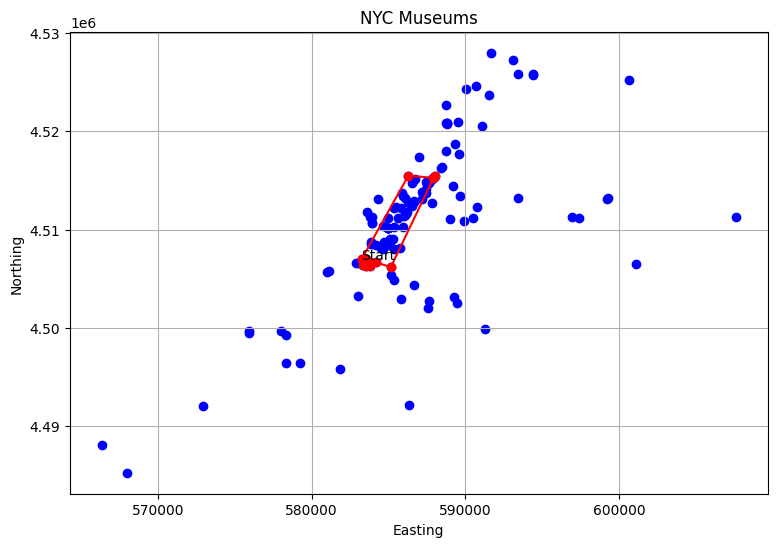

In [72]:
fig, ax = plt.subplots(figsize = (9,6))
plt.scatter(df["easting"], df["northing"], c='blue', marker='o')
#plt.xlim(575000, 586000)
#plt.ylim(4.495*10**6, 4.51*10**6)
plt.plot(df["easting"].iloc[order], df["northing"].iloc[order], c='red', marker='o')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('NYC Museums')
ax.annotate('Start', xy=(df["easting"].iloc[start_idx]-0.0001, df["northing"].iloc[start_idx]), xytext=(df["easting"].iloc[start_idx]-0.001, df["northing"].iloc[start_idx]-0.002))
plt.grid()
plt.show()

This one optimizes the "loop" so that there are more chances to explore, with a path more like a circle (not wasted on random side paths)

## Other implementations

In [664]:
def directional_route(df, start_idx, end_idx, k,
                      alpha=1.0, beta=2.0, gamma=0.5):

    visited = [start_idx]
    remaining = set(df.index) - {start_idx, end_idx}

    start = df.iloc[start_idx][["easting", "northing"]].values
    end = df.iloc[end_idx][["easting", "northing"]].values

    global_dir = end - start
    global_dir /= np.linalg.norm(global_dir)

    current_idx = start_idx
    curr = start
    total_dist = 0

    for _ in range(k):
        best_score = np.inf
        best_idx = None
        best_xy = None

        for idx in remaining:
            row = df.iloc[idx]
            cand = row[["easting", "northing"]].to_numpy(dtype=float)

            v = cand - curr
            dist = np.linalg.norm(v)
            if dist == 0:
                continue

            alignment = np.dot(v / dist, global_dir)
            remain = np.linalg.norm(end - cand)

            score = alpha * dist - beta * alignment + gamma * remain

            if score < best_score:
                best_score = score
                best_idx = idx
                best_xy = cand
        total_dist += distance(
            df.loc[current_idx, "easting"], df.loc[current_idx, "northing"],
            best_xy[0], best_xy[1]
        )
        visited.append(best_idx)
        remaining.remove(best_idx)
        current_idx = best_idx
        curr = best_xy
    total_dist += distance(
        df.loc[current_idx, "easting"], df.loc[current_idx, "northing"],
        df.loc[end_idx, "easting"], df.loc[end_idx, "northing"]
    )
    visited.append(end_idx)
    return visited, total_dist

In [665]:
itinerary, dist = directional_route(df, start_idx, end_idx, num_locations)

In [667]:
print(itinerary)
full_itinerary = df.iloc[itinerary]["name"]
print(full_itinerary)
print(dist)

[np.int64(130), 80, 66, 108, np.int64(131)]
130                                                start
80     National September 11 Memorial & Museum at the...
66                            Museum of American Finance
108                          South Street Seaport Museum
131                                                  end
Name: name, dtype: object
5121.871293940362


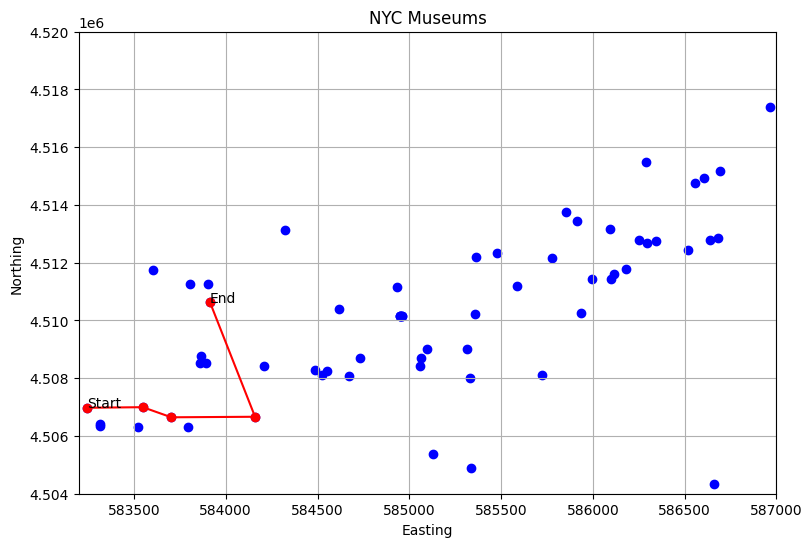

In [668]:
fig, ax = plt.subplots(figsize = (9,6))
plt.scatter(df["easting"], df["northing"], c='blue', marker='o')
plt.xlim(583200, 587000)
plt.ylim(4.504*10**6, 4.52*10**6)
plt.plot(df["easting"].iloc[itinerary], df["northing"].iloc[itinerary], c='red', marker='o')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('NYC Museums')
ax.annotate('Start', xy=(df["easting"].iloc[start_idx]-0.0001, df["northing"].iloc[start_idx]), xytext=(df["easting"].iloc[start_idx]-0.001, df["northing"].iloc[start_idx]-0.002))
ax.annotate('End', xy=(df["easting"].iloc[end_idx]+0.0001, df["northing"].iloc[end_idx]), xytext=(df["easting"].iloc[end_idx]+0.0003, df["northing"].iloc[end_idx]+0.001))
plt.grid()
plt.show()

In [127]:
num_days = 3

In [103]:
coords = df[["easting", "northing"]].drop(index = [start_idx, end_idx])
coords = coords.to_numpy(dtype = float)

In [68]:
def kmeans_init(locations, days):
    n, d = locations.shape[0], locations.shape[1] # d = number of features considered
    centers = np.zeros((days, d), dtype=float)
    remain_index = list(range(n))

        # random init
    zero_init = np.random.randint(n)
    centers[0] = locations[zero_init]
    remain_index.remove(zero_init)
    for idx in range(1, days):
        dists = np.min(np.linalg.norm(locations[remain_index][:,None,:] - centers[None, :idx, :], axis = 2)**2, axis = 1)
        probs = dists / np.sum(dists)
        new_idx = np.random.choice(remain_index, p=probs)
        centers[idx] = locations[new_idx]
        remain_index.remove(new_idx)
    return centers

In [69]:
print(kmeans_init(coords, num_days))

[[ 591249.63804444 4499836.52380464]
 [ 587878.99486352 4515258.28200253]
 [ 583792.19327191 4506314.20721301]]


In [ ]:
# typical k-means++ implementation
def kmeans_plus(locations, days, max_iters=50, eps=1e-5):
    centers = kmeans_init(locations, days)
    # start loop for max_iters times
    for _ in range(max_iters):
        # assign clusters
        dists = np.linalg.norm(locations[:,None,:]-centers[None,:,:], axis = 2)
        labels = np.argmin(dists, axis = 1)

        # recompute centers
        new_centers = np.array([locations[labels == a].mean(axis = 0) if np.any(labels == a) else centers[a] for a in range(days)])
        
        # if total change is less than epsilon, stop loop
        if np.linalg.norm(new_centers - centers) < eps:
            break

        centers = new_centers
    return labels, centers

In [94]:
lab, cen = kmeans_plus(coords, num_days)

In [95]:
print(lab)

[1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0
 0 0 1 0 0 1 0 0 0 1 1 2 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1
 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 2 1 0 1 2 1 0 0 1 1 1
 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1]


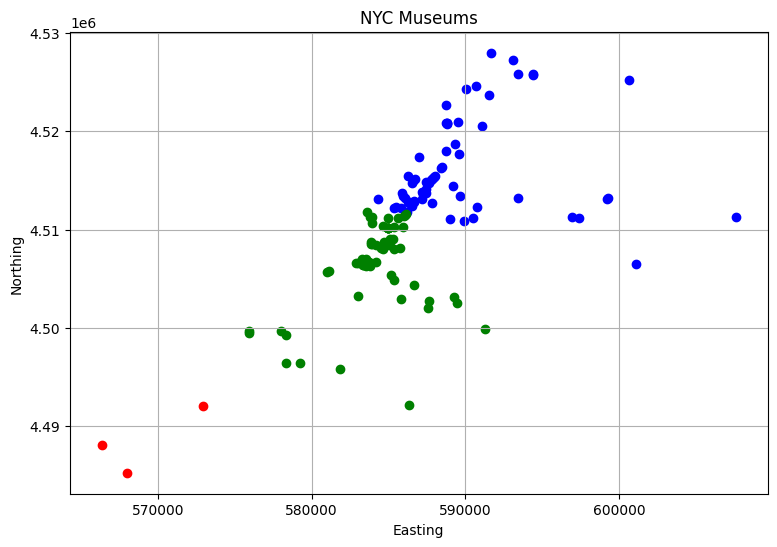

In [99]:
fig, ax = plt.subplots(figsize = (9,6))
plt.scatter(df["easting"][lab == 0], df["northing"][lab == 0], c='blue', marker='o')
plt.scatter(df["easting"][lab == 1], df["northing"][lab == 1], c='green', marker='o')
plt.scatter(df["easting"][lab == 2], df["northing"][lab == 2], c='red', marker='o')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('NYC Museums')
plt.grid()
plt.show()

In [233]:
# want to actually implement k-means based on distance from the starting idx, want to start with start and end idx appended
def kmeans_init_from_start(locs, days, start_idx):
    n, d = locs.shape[0], locs.shape[1] # d = number of features considered
    n = n-2
    locations = locs.to_numpy(dtype = float)
    # already define one of the centers as the starting idx
    centers = np.zeros((days+1, d), dtype=float)
    centers[0] = locations[start_idx]
    remain_index = list(range(n))

    for idx in range(1, days+1):
        dists = np.min(np.linalg.norm(locations[remain_index][:,None,:] - centers[None, :idx, :], axis = 2)**2, axis = 1)
        probs = dists / np.sum(dists)
        new_idx = np.random.choice(remain_index, p=probs)
        centers[idx] = locations[new_idx]
        remain_index.remove(new_idx)
    return centers

In [204]:
# k-means++ implementation with extra cluster
def kmeans_plus_start(locations, days, start_idx, max_iters=50, eps=1e-5):
    centers = kmeans_init_from_start(locations, days, start_idx)
    locations = locations.to_numpy(dtype = float)
    # start loop for max_iters times
    for _ in range(max_iters):
        # assign clusters
        dists = np.linalg.norm(locations[:,None,:]-centers[None,:,:], axis = 2)
        labels = np.argmin(dists, axis = 1)
        # recompute centers
        new_centers = np.array([locations[labels == a].mean(axis = 0) if np.any(labels == a) else centers[a] for a in range(1,days+1)])
        new_centers = np.concatenate([centers[[0]],new_centers], axis = 0)
        # if total change is less than epsilon, stop loop
        if np.linalg.norm(new_centers - centers) < eps:
            break

        centers = new_centers
    return labels, centers

In [417]:
coords = df[["easting", "northing"]]

In [206]:
print(coords)

           easting        northing
0    583315.457106   4506346.35643
1      579257.6019  4496455.143009
2    588756.555795  4520846.666029
3     586252.66999  4512797.956947
4    581130.780345  4505793.704304
..             ...             ...
127  584946.917004  4510161.685713
128   584956.29587   4510165.15713
129  584952.030695  4510158.566936
130  583245.509212  4506976.586667
131  583913.732578  4510636.702411

[132 rows x 2 columns]


In [210]:
coords = coords.drop(index = [end_idx])

In [211]:
lab, cen = kmeans_plus_start(coords, num_days, start_idx)

In [214]:
print(lab)

[0 3 1 1 0 1 0 1 0 1 1 1 1 1 1 3 0 3 0 1 0 1 3 1 1 1 0 0 0 1 0 1 0 0 1 3 1
 1 1 3 1 1 3 0 0 1 0 0 2 1 1 0 1 1 1 0 3 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0
 1 1 1 1 3 0 0 1 0 0 0 1 1 0 0 1 3 3 1 1 1 1 1 1 1 0 2 0 1 0 2 0 1 1 0 3 3
 1 0 0 1 3 0 0 0 1 1 1 1 3 0 0 0 0 0 0 0]


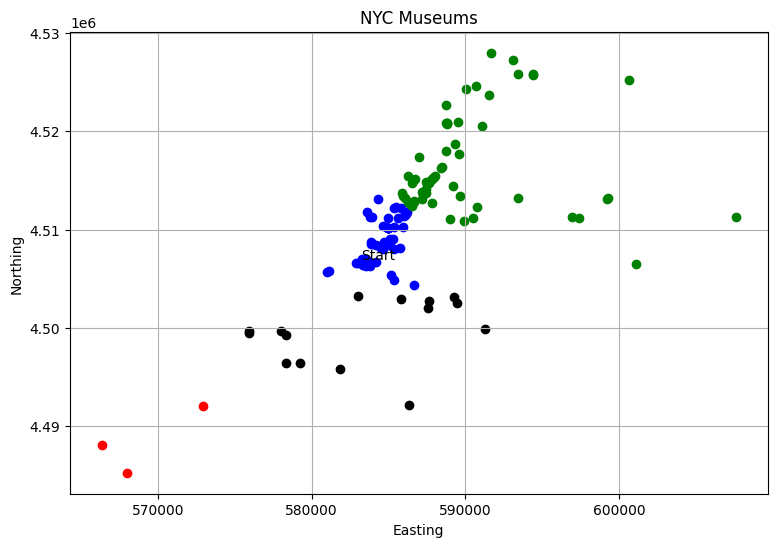

In [216]:
fig, ax = plt.subplots(figsize = (9,6))
plt.scatter(coords["easting"][lab == 0], coords["northing"][lab == 0], c='blue', marker='o')
plt.scatter(coords["easting"][lab == 1], coords["northing"][lab == 1], c='green', marker='o')
plt.scatter(coords["easting"][lab == 2], coords["northing"][lab == 2], c='red', marker='o')
plt.scatter(coords["easting"][lab == 3], coords["northing"][lab == 3], c='black', marker='o')
ax.annotate('Start', xy=(coords["easting"].iloc[start_idx]-0.0001, coords["northing"].iloc[start_idx]), xytext=(df["easting"].iloc[start_idx]-0.001, df["northing"].iloc[start_idx]-0.002))
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('NYC Museums')
plt.grid()
plt.show()

## ISSUES
Want to have a balance between number of points in the clusters and the clusters itself - want to have a fairly balanced number of points in each cluster
Also want the center, fixed cluster point to have many less points (usually very close to where user is staying, can be explored after dinner or after the day's activities)

- Can use a penalized k-means!

cost of point x and cluster k:
$$cost(x,k) = \lVert x-\mu_k \rVert^2+\lambda \cdot \lVert n_k - a_k \rVert^2 + \gamma \cdot \lVert \mu_k - start \rVert^2 + \delta_k$$

$\lVert x-\mu_k \rVert^2$ constrains distance from cluster centers\
$\lVert n_k - a_k \rVert^2$ constrains number of points in each cluster\
$\lVert \mu_k - start \rVert^2$ constrains transportation time it takes to get to the cluster\
$\delta_k$ = cluster bias (only different for fixed cluster)\
$n_k$ = number of points in cluster $k$\
$a_k$ = average number of points in each cluster (apart from starting point)\
$\mu_k$ = cluster center


In [422]:
coord = df[["easting", "northing"]]

In [445]:
# penalized k-means, will use same k_means++ distribution for initiation (want cluster centers to be as spread out as possible initially)
def penal_k_means(locs, days, start_idx, lam=0.2, gam=1e-7, max_iters=50, eps=1e-5):
    centers = kmeans_init_from_start(locs, days, start_idx)
    locations = locs.drop(index = [end_idx])
    n,d = locations.shape[0], locations.shape[1]
    locations = locations.to_numpy(dtype = float)
    costs = np.zeros((n, d))
    delt = np.zeros(days+1)
    delt[0] = 500
    # start loop for max_iters times
    for _ in range(max_iters):
        # assign clusters
        dists = np.linalg.norm(locations[:,None,:]-centers[None,:,:], axis = 2)
        sizes = np.zeros(days+1)
        tar = [(n-1)/days if a != 0 else 1 for a in range(days+1)]
        labels = np.empty(n)
        # want to have initial assignments and then adjust to locally optimal minima/maxima like in gradient descent
        dist_pen = gam*(np.linalg.norm(centers-centers[0], axis = 1))**2
        for i in np.argsort(np.min(dists, axis = 1)):
            costs = []
            for j in range(days+1):
                bal_pen = lam*(sizes[j]-tar[j])**2
                costs.append(dists[i,j]+bal_pen+dist_pen[j]+delt[j])
            idx = np.argmin(costs)
            labels[i] = idx
            sizes[idx] += 1
        print(np.unique(labels))

            # recompute centers
        new_centers = centers.copy()
        for j in range(days+1):
            if j == 0:
                continue
            elif np.any(labels == j):
                new_centers[j] = locations[labels == j].mean(axis = 0)
        # if total change is less than epsilon, stop loop
        if np.linalg.norm(new_centers - centers) < eps:
            break

        centers = new_centers
    return labels, centers


In [446]:
lab, cen = penal_k_means(coord, num_days, start_idx)

[0. 1. 2. 3.]
[0. 1. 2. 3.]
[0. 1. 2. 3.]
[0. 1. 2. 3.]
[0. 1. 2. 3.]


In [447]:
print(lab)

[0. 1. 2. 3. 0. 3. 0. 3. 0. 3. 2. 2. 3. 2. 2. 0. 0. 0. 0. 3. 0. 2. 1. 3.
 3. 2. 0. 3. 0. 2. 0. 3. 0. 0. 3. 1. 3. 3. 2. 1. 2. 2. 0. 3. 3. 3. 0. 0.
 1. 2. 3. 3. 3. 3. 3. 3. 0. 3. 0. 3. 3. 3. 2. 3. 3. 3. 0. 3. 3. 3. 0. 0.
 0. 0. 3. 3. 3. 3. 1. 0. 0. 3. 0. 0. 0. 3. 3. 3. 0. 3. 1. 0. 3. 3. 3. 3.
 3. 3. 3. 0. 1. 3. 3. 3. 1. 0. 3. 3. 0. 1. 1. 3. 0. 0. 3. 0. 3. 3. 0. 2.
 2. 2. 3. 0. 0. 0. 0. 0. 0. 0. 0.]


In [448]:
coords = df.drop(index = [end_idx])

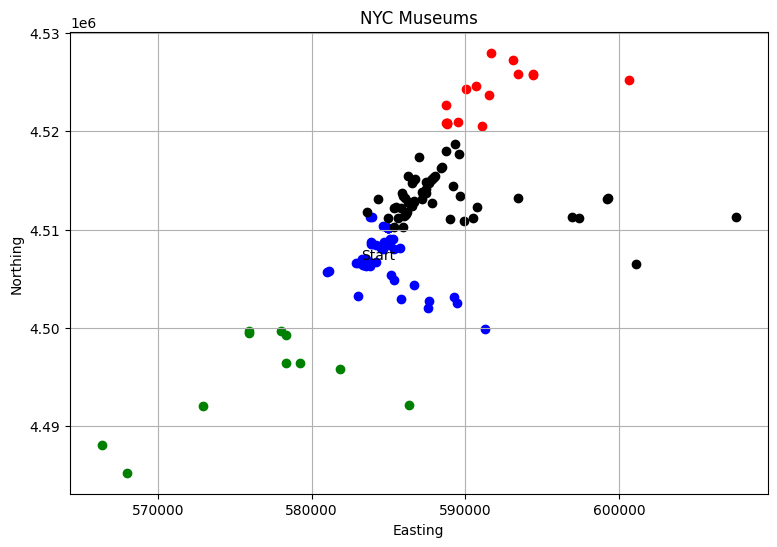

In [449]:
fig, ax = plt.subplots(figsize = (9,6))
plt.scatter(coords["easting"][lab == 0], coords["northing"][lab == 0], c='blue', marker='o')
plt.scatter(coords["easting"][lab == 1], coords["northing"][lab == 1], c='green', marker='o')
plt.scatter(coords["easting"][lab == 2], coords["northing"][lab == 2], c='red', marker='o')
plt.scatter(coords["easting"][lab == 3], coords["northing"][lab == 3], c='black', marker='o')
ax.annotate('Start', xy=(coords["easting"].iloc[start_idx]-0.0001, coords["northing"].iloc[start_idx]), xytext=(df["easting"].iloc[start_idx]-0.001, df["northing"].iloc[start_idx]-0.002))
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('NYC Museums')
plt.grid()
plt.show()